In [1]:
#Bibliotecas Utilizadas
import pandas as pd
import pickle
import shap
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score,classification_report, roc_curve
import os

In [15]:
with open("modelos_hiperparametrizados/rf_sudeste_sub.pkl", 'rb') as arquivo:
    rf = pickle.load(arquivo)

with open("modelos_hiperparametrizados/catboost_sudeste_sub.pkl", 'rb') as arquivo:
    catboost = pickle.load(arquivo)

with open("modelos_hiperparametrizados/lgbm_sudeste_sub.pkl", 'rb') as arquivo:
    lgbm = pickle.load(arquivo)

with open("modelos_hiperparametrizados/xgboost_sudeste_sub.pkl", 'rb') as arquivo:
    xgboost = pickle.load(arquivo)

In [6]:
# Importar dados
X_train_sudeste = pd.read_csv("dados/train_test/X_train_sudeste.csv")
X_test_sudeste = pd.read_csv("dados/train_test/X_test_sudeste.csv")
y_train_sudeste = pd.read_csv("dados/train_test/y_train_sudeste.csv")
y_test_sudeste = pd.read_csv("dados/train_test/y_test_sudeste.csv")

In [17]:
y_pred_xgboost = xgboost.predict(X_test_sudeste)
prob_pos_xgboost = xgboost.predict_proba(X_test_sudeste)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test_sudeste, y_pred_xgboost)))
print("Precision: {:.4f}".format(precision_score(y_test_sudeste, y_pred_xgboost)))
print("Recall: {:.4f}".format(recall_score(y_test_sudeste, y_pred_xgboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test_sudeste, prob_pos_xgboost)))
print("")

prob_pos_rf = rf.predict_proba(X_test_sudeste)[:, 1]
y_pred_rf = rf.predict(X_test_sudeste)

print('Random Forest Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test_sudeste, y_pred_rf)))
print("Precision: {:.4f}".format(precision_score(y_test_sudeste, y_pred_rf)))
print("Recall: {:.4f}".format(recall_score(y_test_sudeste, y_pred_rf)))
print("AUC: {:.4f}".format(roc_auc_score(y_test_sudeste, prob_pos_rf)))
print("")

y_pred_lgbm = lgbm.predict(X_test_sudeste)
prob_pos_lgbm = lgbm.predict_proba(X_test_sudeste)[:,1]

print('LightGBM Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test_sudeste, y_pred_lgbm)))
print("Precision: {:.4f}".format(precision_score(y_test_sudeste, y_pred_lgbm)))
print("Recall: {:.4f}".format(recall_score(y_test_sudeste, y_pred_lgbm)))
print("AUC: {:.4f}".format(roc_auc_score(y_test_sudeste, prob_pos_lgbm)))
print("")

y_pred_catboost = catboost.predict(X_test_sudeste)
prob_pos_catboost = catboost.predict_proba(X_test_sudeste)[:,1]

print('CatBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test_sudeste, y_pred_catboost)))
print("Precision: {:.4f}".format(precision_score(y_test_sudeste, y_pred_catboost)))
print("Recall: {:.4f}".format(recall_score(y_test_sudeste, y_pred_catboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test_sudeste, prob_pos_catboost)))
print("")

XGBoost Model
Accuracy: 0.8582
Precision: 0.5872
Recall: 0.2116
AUC: 0.7954

Random Forest Model
Accuracy: 0.8563
Precision: 0.6494
Recall: 0.1084
AUC: 0.7868

LightGBM Model
Accuracy: 0.8574
Precision: 0.5816
Recall: 0.2035
AUC: 0.7958

CatBoost Model
Accuracy: 0.8574
Precision: 0.5816
Recall: 0.2035
AUC: 0.7958



Pergunta: métricas do carboost e lgbm estão iguais. Está correto?

## SHAP

In [18]:
#Adjusting SHAP
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(X_test_sudeste)

Olhar análise de correspondencia (categorica) e correlação (numerica) canonica  
Olhar MCA (PCA para categoricas) 

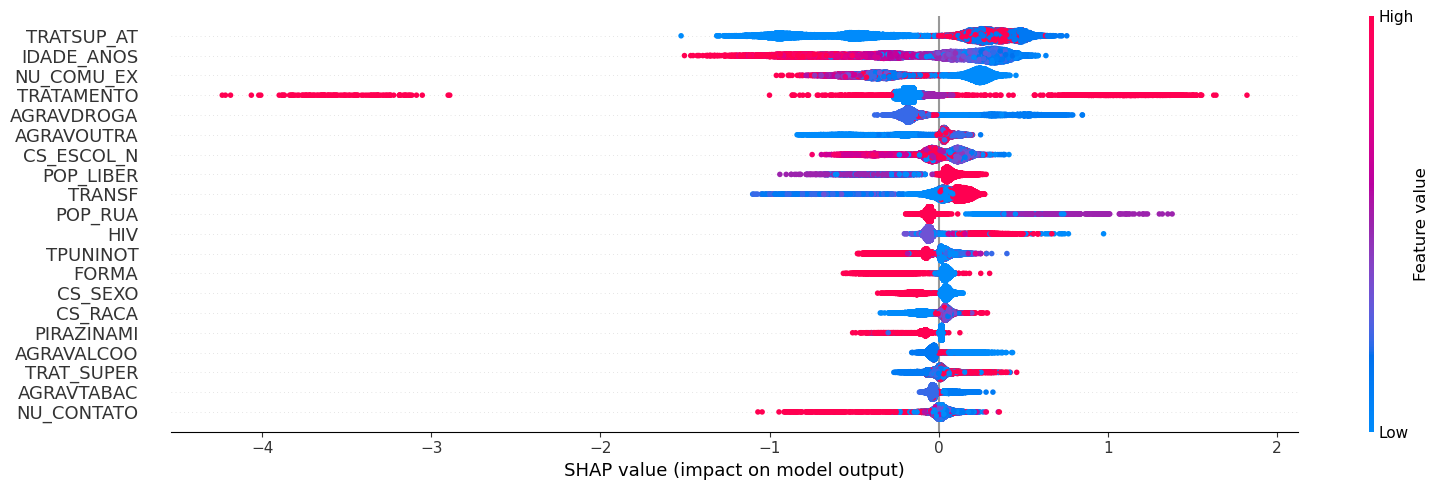

In [19]:
shap.summary_plot(shap_values, X_test_sudeste, show=False,plot_size=(16, 5))

Encaminhamento: juntar as varipavies TRAT_SUPER com TRATSUP_AT?

## Modelo Local Regiões

## Modelo Sudeste -> Regiões

## Transfer Learning

In [ ]:
pd.read_csv()